<p align="center"><h1 align="center">QMSS5074GR <br> Projects in Advanced Machine Learning <br>Spring 2024 <br>Assignment 2 [GROUP PROJECT]</h1>

---
<br>

#### (Change Unis in the title of your notebook. The format should be `assignment2_GRPID_UNI1_UNI2... UNIn.ipynb`)
#### **Your Unis** : hs3458, kem2231
#### **Your Full names** : Harini Sundararajan, Kate McGrath
#### **Your AI Model Share Usernames**: harinisund, kem2231
#### **Link to your Public Github repository** : Fill here (single link is expected)
#### **Team member Contribution Percentages** : Fill here

---
<br>

This notebook contains starter code (and instructions) for our 2nd assignment where we'll work with COVID data. For this assignment you are expected to work in groups. Each group has to make a single assihnment submission.<br><br>
You shall be graded on your learning and initiative outside classroom,  understanding and correctness.
<br><br>
<b>Treat this as a major project where you go looking for the best methods to prepare data, experiment with and train different models, and evaluate results as holistically as possible.</b>
<br><br>
Short but to-the-point answers to conceptual questions are acceptable as long as they convey your ideas effectively.<br><br>
Reference codes have been given for an understanding of what is to be done. Refrain from using the same for your submissions.<br><br>
Marks may be deducted for failure to adhere to any instructions provided in the cell blocks below.<br><br><br>


Instructions for this assignment:

1. Your final report should be written up in a Jupyter notebook. It should be posted to a **public** Github repo as an ipynb. This notebook ipynb would be submitted as an assignment via courseworks. Please include the link to your Github repo in this ipynb file.
<br><br>
2. **Your report should include the following information:**
    * Citation of paper providing original dataset:  M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, “Can AI help in screening Viral and COVID-19 pneumonia?” arXiv preprint, 29 March 2020, [Link](https://arxiv.org/abs/2003.13145)<br><br>
3. **Overall Outline of this notebook**
    * Visualize images that demonstrate when x-rays demonstrate Covid Positivity. You can do other basic data visualization steps here. <span style="color:yellow;"> (5 pts)</span> <br><br>
    * Analyze the dataset and explain the outcomes. Perform Image Augmentation on the dataset <span style="color:yellow;"> (10 pts)</span><br><br>
    * Run at least 4 prediction models to try to predict x-ray images well.<span style="color:yellow;"> (45 pts)</span>
        * Use at the minimum 2 from-scratch CNN models and minimum 2 transfer learning models
        * Answer questions and Discuss which models performed better and point out relevant hyper-parameter values for successful models.
        * Submit your best three models to the leader board for the Covid X-ray Diagnostic AI Model Share competition.<br><br>
    * After you submit your first 4 models, experiment with finding the best model with your team<span style="color:yellow;"> (10 pts)</span>
        * Fit and submit atleast one more and up to three more models after discussion with your team. This part is to encourage you to try different architectures and get competitive or better accuracies.
        *  Discuss results<br><br>
    * Discuss exhaustively which models you tried finally and compare properly which models performed better. <span style="color:yellow;"> (15 pts)</span><br><br>
4. Make the Python Code repo, Front end notebook, Final report and README file. Mention the citations, and your model evaluations and discussion in your `README`, and ensure your `README` looks professional. Examples are in the section. <span style="color:yellow;"> (15 pts)</span>


---

# **STEP 0: Install the `ai modelshare` package**

In [ ]:
# Begin to submit models to image classification leaderboard
! pip install aimodelshare --upgrade
# Restart session Runtime > Restart runtime

  Using cached aimodelshare-0.1.11-py3-none-any.whl (975 kB)
  Using cached boto3-1.26.69-py3-none-any.whl (132 kB)
  Using cached botocore-1.29.82-py3-none-any.whl (10.5 MB)
  Using cached onnx-1.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Using cached onnxconverter_common-1.14.0-py2.py3-none-any.whl (84 kB)
  Using cached keras2onnx-1.7.0-py3-none-any.whl (96 kB)
  Using cached tf2onnx-1.16.1-py3-none-any.whl (455 kB)
  Using cached skl2onnx-1.16.0-py2.py3-none-any.whl (298 kB)
  Using cached onnxruntime-1.17.1-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.8 MB)
  Using cached pydot-1.3.0-py2.py3-none-any.whl (18 kB)
  Using cached importlib_resources-5.10.0-py3-none-any.whl (34 kB)
  Using cached onnxmltools-1.12.0-py2.py3-none-any.whl (329 kB)
  Using cached Pympler-0.9.tar.gz (178 kB)
  Preparing metadata (setup.py) ... done
  Using cached docker-5.0.0-py2.py3-none-any.whl (146 kB)
  Using cached wget-3.2.zip (10 kB)
  Preparing met

# **STEP 1: Import packages and extract the dataset**

**Download the zip file and upload the zip file to your drive. The code assume you will upload it to your base folder in drive... however you can change the directory (just make sure to update the path accordingly)**

In [32]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

# content in your drive is now available via "/content/drive/My Drive"

# Import data and unzip files to folder
!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

In [34]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


# **STEP 2: Prepare the dataset**

In [35]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
#print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]


In [36]:
#Reduce number of images to first 1345 for each category
#fnames[0] = fnames[0][0:1344]
#fnames[1] = fnames[1][0:1344]
#fnames[2] = fnames[2][0:1344]

for i in range(len(fnames)):
  fnames[i] = fnames[i][0:1344]

#print('number of images for each category:', [len(f) for f in fnames])

In [37]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img

#Try on single flower file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

In [38]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths = fnames[0] + fnames[1] + fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data = list(map(preprocessor, image_filepaths))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X = np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [39]:
print(len(X))          # same number of elements as filenames
print(X.shape)         # dimensions now (192,192,3) for all 4032 images
print(X.min().round()) # min value of every image is zero
print(X.max())         # max value of every image is one

4032
(4032, 192, 192, 3)
-0.0
1.0


In [40]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

print('number of images for each category:', [len(f) for f in fnames])
covid = list(repeat("COVID", 1344))
normal = list(repeat("NORMAL", 1344))
pneumonia = list(repeat("PNEUMONIA", 1344))

#combine into single list of y labels
y_labels = covid + normal + pneumonia

#check length, same as X above
print(len(y_labels))

# Need to one hot encode for Keras.  Let's use Pandas
import pandas as pd
y = pd.get_dummies(y_labels)

# display(y)

number of images for each category: [1344, 1344, 1344]
4032


# **STEP 3: Visualizations <span style="color:yellow;">(5pts)</span>**

**Use the `fnames` variable to extract images from all possible combinations of input data and plot them below. Make sure to label each plot appropriately**

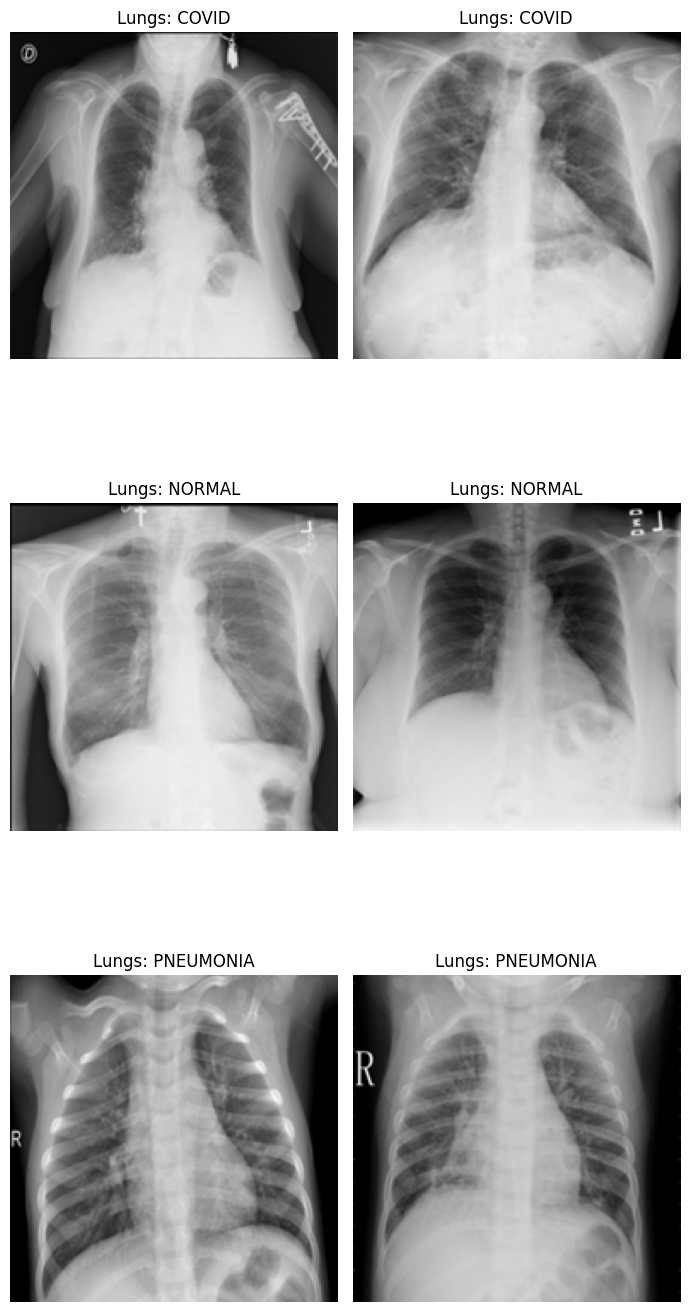

In [9]:
# your code here

fig,ax = plt.subplots(3,2)
fig.set_size_inches(7,15)
# randomly choosing two images from each category to display
for i in range(len(fnames)):
  for j in range (2):
    l = np.random.randint(0, len(fnames[i]))
    ax[i,j].imshow(preprocessor(fnames[i][l]))
    ax[i,j].set_title('Lungs: ' + y_labels[1344*i + l])
    ax[i,j].axis('off')

plt.tight_layout()

# **STEP 4: Analyzing and Augmenting Dataset <span style="color:yellow;">(10pts)</span>**


In [41]:
# ???

What are the data analysis steps you performed? What did you notice? What are you conclusions?

In [42]:
## Your answer here

In [43]:
# Implement Data Augmentation steps (here or above during preprocessing)

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

train_datagen = ImageDataGenerator(
    zoom_range = 0.1,
    rotation_range = 15,
    width_shift_range = .05,
    height_shift_range = .05)

val_datagen = ImageDataGenerator(
    zoom_range = 0.1, # apply random zoom transformations
    rotation_range = 15, # randomly rotate images by 15 degrees
    width_shift_range = .05, # randomly shift images horizontally by 5% of the width
    height_shift_range = .05) # randomly shift images vertically by 5% of the height

What specific preprocessing and augmentation strategies did you apply to your dataset, and why? How would these strategies improve your model's training and generalization?

In [44]:
# using the following augmetation strategies:
  # zoom -- zooming in and out with a range from 90% to 110%, providing new images that
    # don't lose any of the integral data
  # rotation -- rotates the image by a degree between 0 and 15. this follows what the
    # paper did, adding new angles for the images that are likely all slightly different
  # shift -- translating the image, both horizontally and vertically, again following
    # what the paper did. this recenters the image such that the lungs are in a new
    # location

# these strategies all do their part to create new images that are realistic from
  # the base image. they make it so that the database of images is much expanded, and
  # there is less of a dependence on the initial orientation of the x-ray images. so,
  # the model's training and generalization is improved as there is more variety making
  # it easier to understand the relevant parts of the images.

# **STEP 5: Splitting Dataset**

**No coding to be done here**

In [45]:
# ======Train test split resized images (Hackathon Note!! Use same train test split to be able to submit predictions to leaderboard!)=======================================
from sklearn.model_selection import train_test_split

X_train0, X_test, y_train0, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)

#X_test.shape, y_test.shape

In [46]:
#Clear objects from memory

del(X)
del(y)
del(preprocessed_image_data)

In [47]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle

# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train0, file)

# Open a file and use dump()
with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

# Open a file and use dump()
with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train0, file)

# Open a file and use dump()
with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [48]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle

# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

In [50]:
# added line to additoinally split for a validation set

X_train, X_val, y_train, y_val = train_test_split(X_train0, y_train0, stratify = y_train0, test_size = 0.2, random_state = 2121)

# **STEP 6: Model Training and parameter tuning <span style="color:yellow;"> (45pts)</span>**

**Define your model architecture, define the model parameters, define the training parameters, define the training values. <br><br>
Use the code provided below as a reference.<br><br>
Test out as many models here as you want, but submit (to aimodelshare) only your final models. Excessive submissions will be penalized.<br><br>**


In [ ]:
# Save preprocessor function (may need to reload function in cell above)
import aimodelshare as ai
from aimodelshare.aws import set_credentials

ai.export_preprocessor(preprocessor,"")

apiurl='https://bb4mkgq8sb.execute-api.us-east-2.amazonaws.com/prod/m'

experiment= ai.Experiment(apiurl)

set_credentials(apiurl=apiurl)

# NOTE :

**In the following sections, keep proper track of your experimentations, models (name them properly), their histories (both as csv's and exported images of loss curves), evaluations and results (export csv's and keep track), and their saved model exports (.h files).**

You will need to upload the final saved models and download them later as weights to build an inference engine. Your results should be reproducible, so use random seeds at appropriate places.

# **STEP 6(a): Custom CNN based models**

You will build a minimum of 2 CNN models. The depth of all models should be a minimum of 12 Convolutional layers (not counting BatchNorms, Pools and Activations). Print model summaries with Input shape defined.

In [ ]:
# first CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping

with tf.device('/device:GPU:0'):
  model1 = Sequential()

  model1.add(Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)))
  model1.add(Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'))
  model1.add(MaxPooling2D(pool_size=2))
  model1.add(Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'))
  model1.add(Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'))
  model1.add(MaxPooling2D(pool_size=2))
  model1.add(Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'))
  model1.add(Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'))
  model1.add(MaxPooling2D(pool_size=2))
  model1.add(Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'))
  model1.add(Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'))
  model1.add(MaxPooling2D(pool_size=2))
  model1.add(Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'))
  model1.add(Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'))
  model1.add(MaxPooling2D(pool_size=2))
  model1.add(Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'))
  model1.add(Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'))
  model1.add(Flatten())

  # classifying into 3 categories
  model1.add(Dense(3, activation='softmax'))

  # checkpoints
  checkpoint_path = "model1_checkpoint.h5"

  red_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs
  mod_check = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
  early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

  # compile the model
  model1.compile(
    optimizer = Adam(learning_rate=0.001), # to use callback set lr arg such as Adam(lr=0.001) instead
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

  batch_size = 32

  # Fitting the CNN to the Training set
  history1 = model1.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch = len(X_train) // batch_size,
    epochs = 30,
    validation_data=train_datagen.flow(X_val, y_val, batch_size=batch_size),
    validation_steps = len(X_val) // batch_size,
    callbacks = [red_lr, mod_check, early_stop]
)

  # eval model on test data
  test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
  print('Test accuracy:', test_acc1)

In [ ]:
model1.summary()

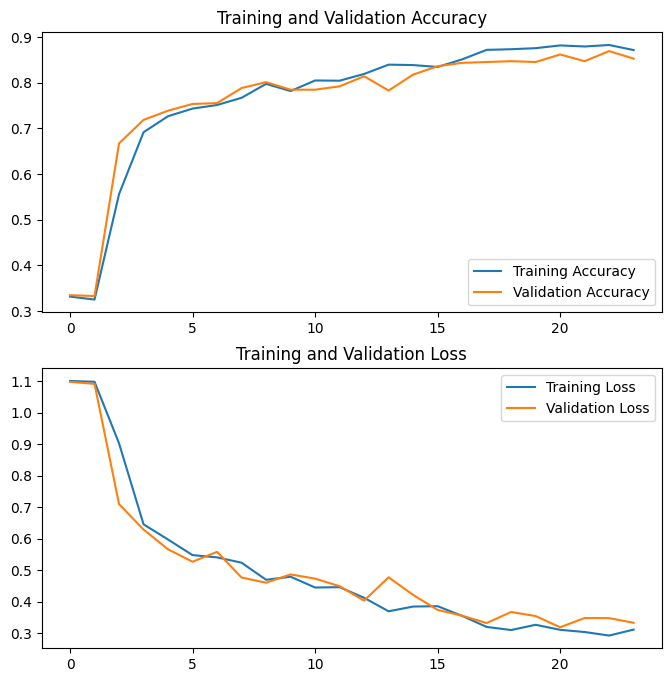

In [53]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs_range = range(24)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss1, label='Training Loss')
plt.plot(epochs_range, val_loss1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model1.save("model1.h5", save_format="h5")

# Save tf.keras model (or any tensorflow model) to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model1 = model_to_onnx(
                            model1,
                            framework='keras',
                            transfer_learning=False,
                            deep_learning=True
                          )


with open("model1.onnx", "wb") as f:
    f.write(onnx_model1.SerializeToString())

# Use X_test data to generate model predictions and make leaderboard submission

# Generate and save predictions

# Load preprocessed data
# If you run out of Colab memory restart runtime, reload data and try again
import pickle


# Open the file in binary mode
with open('X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)


# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)


prediction_column_index = model1.predict(X_test).argmax(axis=1)

# extract correct prediction labels
prediction_labels1 = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model = "model1.onnx",
                        preprocessor="preprocessor.zip",
                        prediction_submission=prediction_labels1
                        )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 1s 26ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): cnn1

Your model has been submitted as model version 453

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3340


In [59]:
# second CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping

with tf.device('/device:GPU:0'):
  model2 = Sequential()

  model2.add(Conv2D(kernel_size=3, filters=64, padding='same', activation='relu', input_shape=(192, 192, 3)))
  model2.add(Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'))
  model2.add(MaxPooling2D(pool_size=2))
  model2.add(Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'))
  model2.add(Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'))
  model2.add(MaxPooling2D(pool_size=2))
  model2.add(Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'))
  model2.add(Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'))
  model2.add(Conv2D(kernel_size=1, filters=256, padding='same', activation='relu'))
  model2.add(MaxPooling2D(pool_size=2))
  model2.add(Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'))
  model2.add(Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'))
  model2.add(Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'))
  model2.add(MaxPooling2D(pool_size=2))
  model2.add(Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'))
  model2.add(Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'))
  model2.add(Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'))
  model2.add(MaxPooling2D(pool_size=2))
  model2.add(Flatten())

  # classifying into 3 categories
  model2.add(Dense(3, activation='softmax'))

  # checkpoints
  checkpoint_path = "model2_checkpoint.h5"

  red_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs
  mod_check = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
  early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

  # compile the model
  model2.compile(
    optimizer = Adam(learning_rate=0.001), # to use callback set lr arg such as Adam(lr=0.001) instead
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

  batch_size = 32

  # Fitting the CNN to the Training set
  history2 = model2.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch = len(X_train) // batch_size,
    epochs = 30,
    validation_data=train_datagen.flow(X_val, y_val, batch_size=batch_size),
    validation_steps = len(X_val) // batch_size,
    callbacks = [red_lr, mod_check, early_stop]
  )

  # eval model on test data
  test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
  print('Test accuracy:', test_acc2)

Epoch 1/30
68/68 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.3907
Epoch 00001: val_accuracy improved from -inf to 0.59559, saving model to model2_checkpoint.h5
68/68 [==============================] - 33s 428ms/step - loss: 1.0718 - accuracy: 0.3907 - val_loss: 0.9989 - val_accuracy: 0.5956 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
68/68 [==============================] - ETA: 0s - loss: 0.8538 - accuracy: 0.5954
Epoch 00002: val_accuracy improved from 0.59559 to 0.63235, saving model to model2_checkpoint.h5
68/68 [==============================] - 29s 432ms/step - loss: 0.8538 - accuracy: 0.5954 - val_loss: 0.7425 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 3/30
68/68 [==============================] - ETA: 0s - loss: 0.6604 - accuracy: 0.6963
Epoch 00003: val_accuracy improved from 0.63235 to 0.72059, saving model to model2_checkpoint.h5
68/68 [==============================] - 30s 436ms/step - loss: 0.6604 - accuracy: 0.6963 - val_loss: 0.6403 - val_accuracy: 0.7206 - lr: 0.0010
Epoch 4/30
68/68 [==============================] - ETA: 0s - loss: 0.6454 - accuracy: 0.7139
Epoch 00004: val_accuracy improved from 0.72059 to 0.72610, saving model to model2_checkpoint.h5
68/68 [==============================] - 34s 501ms/step - loss: 0.6454 - accuracy: 0.7139 - val_loss: 0.6348 - val_accuracy: 0.7261 - lr:

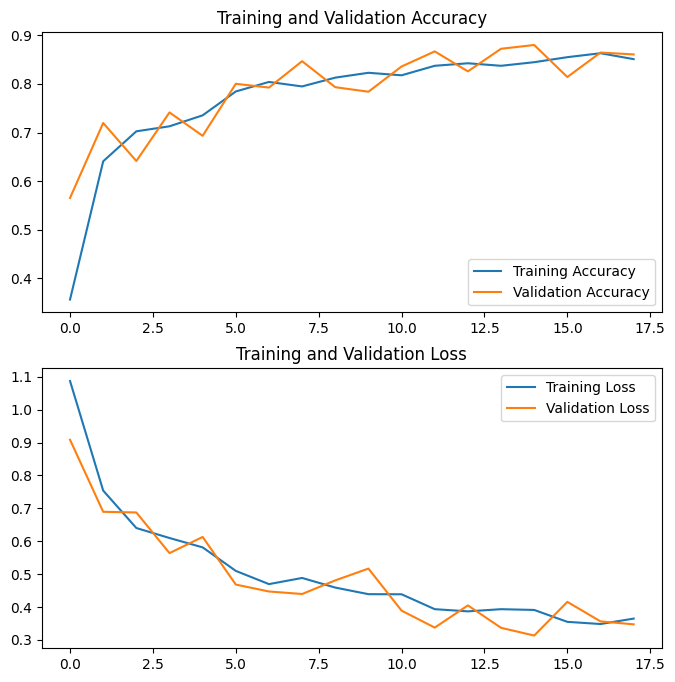

In [21]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range = range(18)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [60]:
model2.save("model_cnn_2_val.h5", save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2.save("model2.h5", save_format="h5")

# Save tf.keras model (or any tensorflow model) to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model2 = model_to_onnx(
                            model2,
                            framework='keras',
                            transfer_learning=False,
                            deep_learning=True
                          )


with open("model2.onnx", "wb") as f:
    f.write(onnx_model2.SerializeToString())

# Use X_test data to generate model predictions and make leaderboard submission

# Generate and save predictions

# Load preprocessed data
# If you run out of Colab memory restart runtime, reload data and try again
import pickle


# Open the file in binary mode
with open('X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)


# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)


prediction_column_index = model2.predict(X_test).argmax(axis=1)

# extract correct prediction labels
prediction_labels2 = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model = "model2.onnx",
                        preprocessor="preprocessor.zip",
                        prediction_submission=prediction_labels2
                        )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 2s 56ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): cnn2

Your model has been submitted as model version 454

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3340


1. What motivated your specific architectural design choices when implementing your custom CNNs? Discuss the reasoning behind the number of layers, types of layers (convolutional, pooling, fully connected, etc.), and their configurations.
2. Which regularization techniques and callbacks did you implement to prevent overfitting? Explain how you chose where to apply these techniques and their effectiveness.
3. Describe your approach to hyperparameter tuning. How did you select the values for learning rate, batch size, and number of epochs? Discuss any strategies you used to find the optimal hyperparameters.
4. Which loss function and optimizer did you choose for training your CNN, and why? How do these choices impact the convergence and accuracy of your model?
5. Reflect on a significant challenge you encountered during the implementation of your CNN. How did you overcome this challenge, and what did you learn from it?

In [ ]:
# 1.
# 2.
# 3.
# 4.
# 5.

# **STEP 6(b): Transfer Learning models**

You will use a minimum of 2 Pre-trained models and Fine-tune them on our dataset. Take careful choices about which models you get from the internet. Cite their usage properly within this notebook, and in the Github repo (instructions in last section).


In [62]:
# first transfer learning model, ResNet50

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, GlobalAveragePooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping

with tf.device('/device:GPU:0'):
  # Load the pre-trained ResNet50 model without the top (classification) layers
  base_model3 = ResNet50(weights='imagenet', include_top=False)

  # Freeze the layers of the pre-trained model
  for layer in base_model3.layers:
      layer.trainable = False

  # Add custom classification layers on top of the base ResNet50 model
  model3 = Sequential([
      base_model3,
      GlobalAveragePooling2D(),       # Global Average Pooling layer, convert features into 1D array
      Dense(256, activation='relu'),  # Fully connected layer with 224 neurons
      Dropout(0.5),                   # Dropout layer to prevent overfitting (50% dropout rate)
      Dense(256, activation='relu'),  # Additional fully connected layer with 256 neurons
      Dropout(0.3),                   # Dropout layer to prevent overfitting (30% dropout rate)
      Dense(256, activation='relu'),  # Additional fully connected layer with 128 neurons
      Dropout(0.2),                   # Dropout layer to prevent overfitting (30% dropout rate)
      Dense(256, activation='relu'),  # Additional fully connected layer with 128 neurons
      Dense(128, activation='relu'),  # Additional fully connected layer with 64 neurons
      Dense(64, activation='relu'),   # Additional fully connected layer with 64 neurons
      Dense(3, activation='softmax')  # Output layer for multi-class classification with 3 classes
  ])

  # Unfreeze the last few layers for fine-tuning
  for layer in base_model3.layers[-30:]:
      layer.trainable = True

  # Compile the model
  model3.compile(optimizer=Adam(learning_rate=0.00001),  # Very low learning rate
                loss='categorical_crossentropy',
                metrics=['accuracy']) #,'recall','specificity','precision','f1_score'

  #callbacks
  checkpoint_path = "model3_checkpoint.h5"

  red_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs
  mod_check = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
  early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

  # This callback will stop the training when there is no improvement in
  # the loss for three consecutive epochs.

  batch_size=32
  history3 = model3.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch = len(X_train) // batch_size,
    epochs = 30,
    validation_data=train_datagen.flow(X_val, y_val, batch_size=batch_size),
    validation_steps = len(X_val) // batch_size,
    callbacks = [red_lr, mod_check, early_stop]
    )

  # Evaluate the model on test data
  test_loss3, test_acc3 = model3.evaluate(X_test, y_test)
  print('Test accuracy:', test_acc3)

Epoch 1/30
68/68 [==============================] - ETA: 0s - loss: 1.0727 - accuracy: 0.4315
Epoch 00001: val_accuracy improved from -inf to 0.33088, saving model to model3_checkpoint.h5
68/68 [==============================] - 45s 510ms/step - loss: 1.0727 - accuracy: 0.4315 - val_loss: 1.0984 - val_accuracy: 0.3309 - lr: 1.0000e-05
Epoch 2/30
68/68 [==============================] - ETA: 0s - loss: 0.9506 - accuracy: 0.5810
Epoch 00002: val_accuracy improved from 0.33088 to 0.33456, saving model to model3_checkpoint.h5
68/68 [==============================] - 36s 526ms/step - loss: 0.9506 - accuracy: 0.5810 - val_loss: 1.0935 - val_accuracy: 0.3346 - lr: 1.0000e-05
Epoch 3/30
68/68 [==============================] - ETA: 0s - loss: 0.7864 - accuracy: 0.6574
Epoch 00003: val_accuracy improved from 0.33456 to 0.57353, saving model to model3_checkpoint.h5
68/68 [==============================] - 33s 485ms/step - loss: 0.7864 - accuracy: 0.6574 - val_loss: 1.0055 - val_accuracy: 0.5735 

In [64]:
model3.save("model_resnet50_val.h5", save_format="h5")

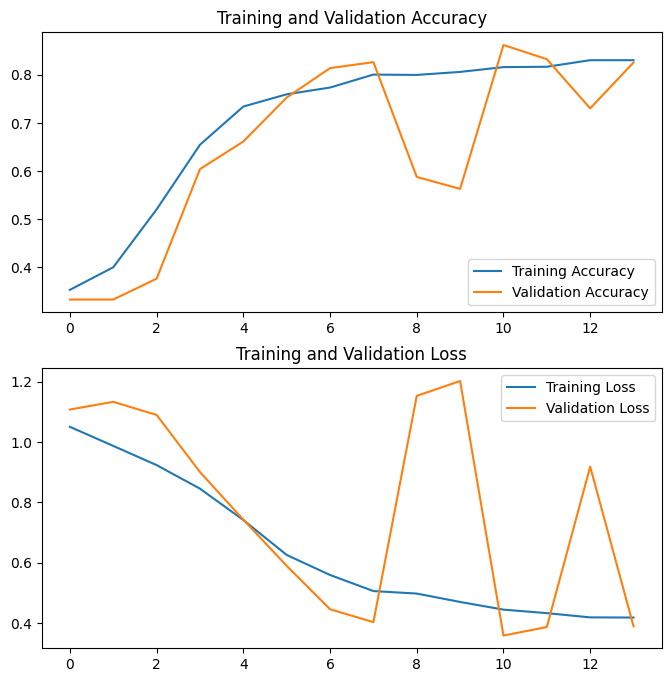

In [25]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs_range = range(14)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc3, label='Training Accuracy')
plt.plot(epochs_range, val_acc3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss3, label='Training Loss')
plt.plot(epochs_range, val_loss3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model3.save("model3.h5", save_format="h5")

# Save tf.keras model (or any tensorflow model) to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model3 = model_to_onnx(
                            model3,
                            framework='keras',
                            transfer_learning=True,
                            deep_learning=False
                          )


with open("model3.onnx", "wb") as f:
    f.write(onnx_model3.SerializeToString())

# Use X_test data to generate model predictions and make leaderboard submission

# Generate and save predictions

# Load preprocessed data
# If you run out of Colab memory restart runtime, reload data and try again
import pickle


# Open the file in binary mode
with open('X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)


# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)


prediction_column_index = model3.predict(X_test).argmax(axis=1)

# extract correct prediction labels
prediction_labels3 = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model = "model3.onnx",
                        preprocessor="preprocessor.zip",
                        prediction_submission=prediction_labels3
                        )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 4s 68ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): transfer learning 1

Your model has been submitted as model version 462

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3340


In [67]:
# second transfer learning

base_model = InceptionV3(weights='imagenet', include_top=False)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base ResNet50 model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global Average Pooling layer, convert features into 1D array
    Dense(256, activation='relu'),  # Fully connected layer with 224 neurons
#    Dropout(0.5),  # Dropout layer to prevent overfitting (50% dropout rate)
    Dense(256, activation='relu'),  # Additional fully connected layer with 256 neurons
#    Dropout(0.3),  # Dropout layer to prevent overfitting (30% dropout rate)
    Dense(256, activation='relu'),  # Additional fully connected layer with 128 neurons
    Dense(256, activation='relu'),  # Additional fully connected layer with 128 neurons
    Dense(128, activation='relu'),  # Additional fully connected layer with 64 neurons
    Dense(64, activation='relu'),  # Additional fully connected layer with 64 neurons
    Dense(3, activation='softmax')  # Output layer for multi-class classification with 3 classes
])

# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-5),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy']) #,'recall','specificity','precision','f1_score'

#callbacks
#reduce lr callback
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs
# Define model checkpoint callback
checkpoint_path = "model_checkpoint.h5"
checkpoint_cb = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
# Define early stopping callback
early_stop= EarlyStopping(monitor='val_loss',
                                        patience=3,  # Number of epochs with no improvement after which training will be stopped
                                        verbose=1)

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

batch_size=32
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch = len(X_train) // batch_size,
    epochs = 30,
    validation_data=train_datagen.flow(X_val, y_val, batch_size=batch_size),
    validation_steps = len(X_val) // batch_size,
    callbacks = [red_lr, mod_check, early_stop]
    )

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

87910968/87910968 [==============================] - 3s 0us/step
Epoch 1/30
68/68 [==============================] - ETA: 0s - loss: 1.0269 - accuracy: 0.5505
Epoch 00001: val_accuracy did not improve from 0.90993
68/68 [==============================] - 43s 441ms/step - loss: 1.0269 - accuracy: 0.5505 - val_loss: 0.8466 - val_accuracy: 0.7518 - lr: 1.0000e-05
Epoch 2/30
68/68 [==============================] - ETA: 0s - loss: 0.7789 - accuracy: 0.7838
Epoch 00002: val_accuracy did not improve from 0.90993
68/68 [==============================] - 27s 404ms/step - loss: 0.7789 - accuracy: 0.7838 - val_loss: 0.6227 - val_accuracy: 0.7776 - lr: 1.0000e-05
Epoch 3/30
68/68 [==============================] - ETA: 0s - loss: 0.5758 - accuracy: 0.8222
Epoch 00003: val_accuracy did not improve from 0.90993
68/68 [==============================] - 27s 403ms/step - loss: 0.5758 - accuracy: 0.8222 - val_loss: 0.4981 - val_accuracy: 0.7868 - lr: 1.0000e-05
Epoch 4/30
68/68 [=======================

In [68]:
model.save("model_inv3_val.h5", save_format="h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


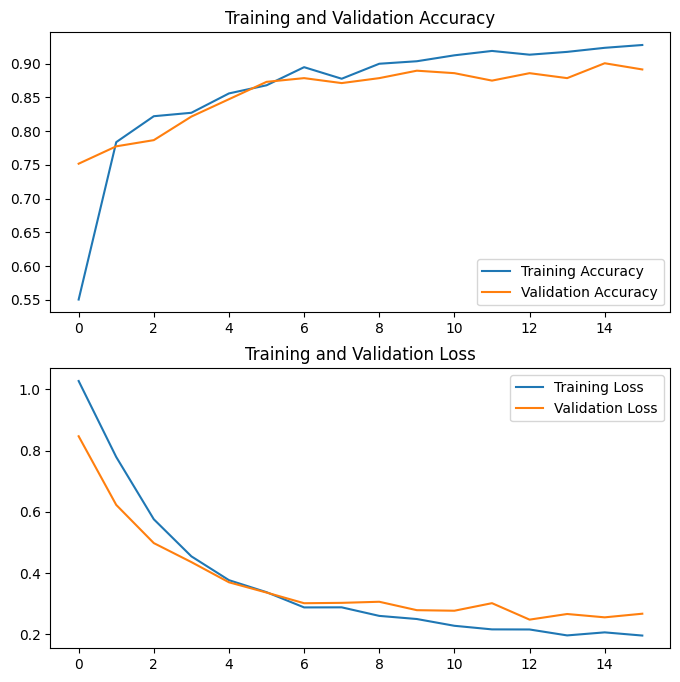

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(16)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1. Which Models did you try for Transfer Learning? What was the pre-trained model originally trained on?
2. Which models converged faster upon fine-tuning? Why do you think that happened?
3. How did you do fine-tuning on this dataset? (What layers did you add / freeze / unfreeze), How many parameters were there in total in the pretrained model you finetuned? How many trainable and untrainable?
4. How does the performance of your Transfer Learning model compare with a model trained from scratch on the same task? Discuss the advantages and potential limitations of using Transfer Learning in this context.
5. Throughout the coding process, what was the most difficult decision you had to make, and how did you arrive at your final choice?




In [ ]:
# your Answers and discussion here

# **STEP 7: Additional Models of your choice <span style="color:yellow;"> (10pts)</span>**

---


Please ensure that you are only using Keras / Tensorflow.

In [65]:
# new CNN model, less layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping

with tf.device('/device:GPU:0'):
  model5 = Sequential()

  model5.add(Conv2D(kernel_size=3, filters=64, padding='same', activation='relu', input_shape=(192, 192, 3)))
  model5.add(MaxPooling2D(pool_size=2))
  model5.add(Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'))
  model5.add(MaxPooling2D(pool_size=2))
  model5.add(Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'))
  model5.add(MaxPooling2D(pool_size=2))
  model5.add(Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'))
  model5.add(MaxPooling2D(pool_size=2))
  model5.add(Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'))
  model5.add(MaxPooling2D(pool_size=2))
  model5.add(Conv2D(kernel_size=3, filters=256, padding='same', activation='relu'))
  model5.add(MaxPooling2D(pool_size=2))
  model5.add(Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'))
  model5.add(MaxPooling2D(pool_size=2))
  model5.add(Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'))
  model5.add(Flatten())

  # classifying into 3 categories
  model5.add(Dense(3, activation='softmax'))

  # checkpoints
  checkpoint_path = "model5_checkpoint.h5"

  red_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs
  mod_check = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)
  early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

  # compile the model
  model5.compile(
    optimizer = Adam(learning_rate=0.001), # to use callback set lr arg such as Adam(lr=0.001) instead
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

  batch_size = 32

  # Fitting the CNN to the Training set
  history5 = model5.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch = len(X_train) // batch_size,
    epochs = 30,
    validation_data=train_datagen.flow(X_val, y_val, batch_size=batch_size),
    validation_steps = len(X_val) // batch_size,
    callbacks = [red_lr, mod_check, early_stop]
    )

  # eval model on test data
  test_loss5, test_acc5 = model5.evaluate(X_test, y_test)
  print('Test accuracy:', test_acc5)

Epoch 1/30
68/68 [==============================] - ETA: 0s - loss: 0.9505 - accuracy: 0.4755
Epoch 00001: val_accuracy improved from -inf to 0.71875, saving model to model5_checkpoint.h5
68/68 [==============================] - 32s 393ms/step - loss: 0.9505 - accuracy: 0.4755 - val_loss: 0.6645 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 2/30
68/68 [==============================] - ETA: 0s - loss: 0.6439 - accuracy: 0.6981
Epoch 00002: val_accuracy did not improve from 0.71875
68/68 [==============================] - 30s 448ms/step - loss: 0.6439 - accuracy: 0.6981 - val_loss: 0.6138 - val_accuracy: 0.7004 - lr: 0.0010
Epoch 3/30
68/68 [==============================] - ETA: 0s - loss: 0.5699 - accuracy: 0.7255
Epoch 00003: val_accuracy improved from 0.71875 to 0.75919, saving model to model5_checkpoint.h5
68/68 [==============================] - 28s 410ms/step - loss: 0.5699 - accuracy: 0.7255 - val_loss: 0.4928 - val_accuracy: 0.7592 - lr: 0.0010
Epoch 4/30
68/68 [===================

In [ ]:
model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 192, 192, 64)      1792      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 96, 96, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 48, 48, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 24, 24, 128)      

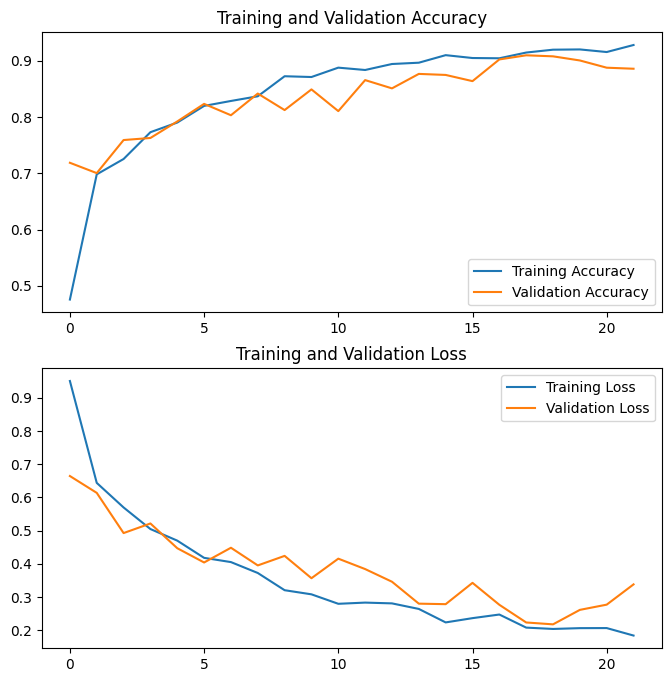

In [72]:
acc5 = history5.history['accuracy']
val_acc5 = history5.history['val_accuracy']

loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs_range = range(22)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc5, label='Training Accuracy')
plt.plot(epochs_range, val_acc5, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss5, label='Training Loss')
plt.plot(epochs_range, val_loss5, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [66]:
model5.save("model_cnn_best_val.h5", save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Reload model and data
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
model5 = tf.keras.models.load_model('model_cnn_best.h5',compile=False)
model5.compile(
    optimizer = Adam(lr=0.001), # to use callback set lr arg such as Adam(lr=0.001) instead
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])
model5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 192, 192, 64)      1792      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 96, 96, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_57 (Conv2D)          (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 48, 48, 128)       73856     
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 24, 24, 128)      

In [ ]:
# model5.save("model5.h5", save_format="h5")

# Save tf.keras model (or any tensorflow model) to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

onnx_model5 = model_to_onnx(
                            model5,
                            framework='keras',
                            transfer_learning=False,
                            deep_learning=True
                          )


with open("model5.onnx", "wb") as f:
    f.write(onnx_model5.SerializeToString())

# Use X_test data to generate model predictions and make leaderboard submission

# Generate and save predictions

# Load preprocessed data
# If you run out of Colab memory restart runtime, reload data and try again
import pickle


# Open the file in binary mode
with open('X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)


# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)


prediction_column_index = model5.predict(X_test).argmax(axis=1)

# extract correct prediction labels
prediction_labels5 = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
experiment.submit_model(model = "model5.onnx",
                        preprocessor="preprocessor.zip",
                        prediction_submission=prediction_labels5
                        )

41/41 [==============================] - 1s 18ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): final cnn

Your model has been submitted as model version 472

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3340


Is there a particular part of your code that you're especially proud of optimizing or simplifying? How did you achieve it?

In [ ]:
# your answer here

Did you try any approaches and models taught outside class? What recently released papers / architectures do you wish you could implement given more time?

# **STEP 8: Analysis of your models (15 pts)**

### **<span style="color:red;">Your Answer here:</span>**

Tabularize your results from different models, compare convergence rates, performance metrics and whichever aspects you deem suitable for comparison. Analyze and Discuss results exhaustively.

### **<span style="color:red;">Your Discussion here:</span>**

# **STEP 9: Conclusions**



### **<span style="color:red;">Your Answer here:</span>**




# **STEP 10: Github Repo <span style="color:yellow;"> (15pts)</span>**

<b>Github Repo: </b>

You will exercise **Modularization** and Good Github organization: You should take the relevant code and make it into classes across different python (.py) files so that you can just import those files and/or classes and/or functions and/or modules, instantiate the model using them, load weights from your saved models, and start predicting on any new set of test images (not just the test set from this dataset).

Essentially, you should have a simple and clean **"front-end" notebook** where you download your trained and saved model(s) from say a personal drive link, and have an inference pipeline ready within a few lines of code to predict on any new unseen x-ray images.



<br><br>

In the **README.md** file of your repository should be an overall outline of your experiments, including the models you trained succesfully and have results for - summarized in a tabular way. You can include other details as well.

Look at different readme's across github to see how they are organized. Refer to [this resource](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to learn how to format the file.

- Example of a [Good Readme File](https://github.com/priyavrat-misra/xrays-and-gradcam#readme) (We have no affiliations with Author)
- Example of a [Bad Readme File](https://github.com/anubhavparas/image-classification-using-cnn)
(No offence is intended to Author)

<br><br>
In the **Final report** (.ipynb) notebook, put whatever code, visuals and results you think is relevant adhering to the modularization that you did. It is open ended, you should not just post a copy of this notebook for it.

<br><br>

Remember that this is your showcase to the public.
Cite the dataset as said before. Cite the open source models and any other models or weights you used for Transfer learning.


#### Do not forget to link the final Github repository containing the Front-end running notebook, your code, Readme and Final report at the top of this notebook.